# Airline Passenger Satisfaction Data Analysis Coursework (PoDS)

## Importing Relevant Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

## Importing Data

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
pd.set_option("display.max_columns", None)
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
print(df_train.shape)
print(df_test.shape)

(103904, 25)
(25976, 25)


## Merging (via Concatenation)

NOTE: I'll be combining Test and Training Set which were provided separately - for the purpose of exploratory data analysis, more specifically data cleaning - will be split later when developing prediction models

In [7]:
df = pd.concat([df_train, df_test], ignore_index = True)
df.reset_index(inplace = True)

In [8]:
df.drop(['index'], axis = 1, inplace = True)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [9]:
df.shape

(129880, 25)

## Data Wrangling

### Dropping Columns, Verifying Valid Entries, Duplicates

Unnamed is not informative, so safe to drop:

In [10]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

The ID columns gives us the passenger ID - so is informative in letting us know whether there are any duplicate rows. 

Once, we have verified there are no duplicate rows, we can also drop this column as it has no use anywhere in analysis and has no predictive capability

In [11]:
df['id'].duplicated().any()

False

As we can see, we have no duplicate rows, we can now drop the ID column.

In [12]:
df.drop(['id'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

All features look to have the correct type

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


We do notice some erroneous values in flight distance, but much more particularly in the departure and arrival delays in minutes considering the large different between the max values and the 75th quartile

In [15]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

It would appear that for arrival delays, we also have around 400 missing values which need to be dealt with

Before - dealing with the above 3 problematic columns, we will verify the remaining columns that don't seem to have problems, have valid entries i.e. ratings being integers from 1 to 5, binary features genuinely being binary etc.

In [16]:
categoricals = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
               'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
               'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
               'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for i in categoricals:
    print(df[i].unique())

[3 2 4 1 5 0]
[4 2 5 3 1 0]
[3 2 5 4 1 0]
[1 3 2 5 4 0]
[5 1 2 4 3 0]
[3 5 2 1 4 0]
[5 1 2 3 4 0]
[5 1 2 3 4 0]
[4 1 2 3 5 0]
[3 5 4 2 1 0]
[4 3 5 1 2]
[4 1 3 5 2 0]
[5 4 3 1 2 0]
[5 1 2 3 4 0]
['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


All passenger ratings are valid ratings, and all other categorical features take expected entries only. It will be convenient to carry out some mappings:

In [17]:
df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 'loyal', 
                                                   'disloyal Customer': 'disloyal'})
df['Customer Type'].unique()

array(['loyal', 'disloyal'], dtype=object)

In [18]:
df['Type of Travel'] = df['Type of Travel'].replace({'Personal Travel': 'personal', 'Business travel'
                                                     : 'business'})
df['Type of Travel'].unique()

array(['personal', 'business'], dtype=object)

### Examining Numerical Features

With all non-numerical features looking fine, lets visualize our numerical features. We saw earlier that Departure and Arrival Delay in Minutes and Flight Distance showed some erroneous values - which would be good to visualize here:

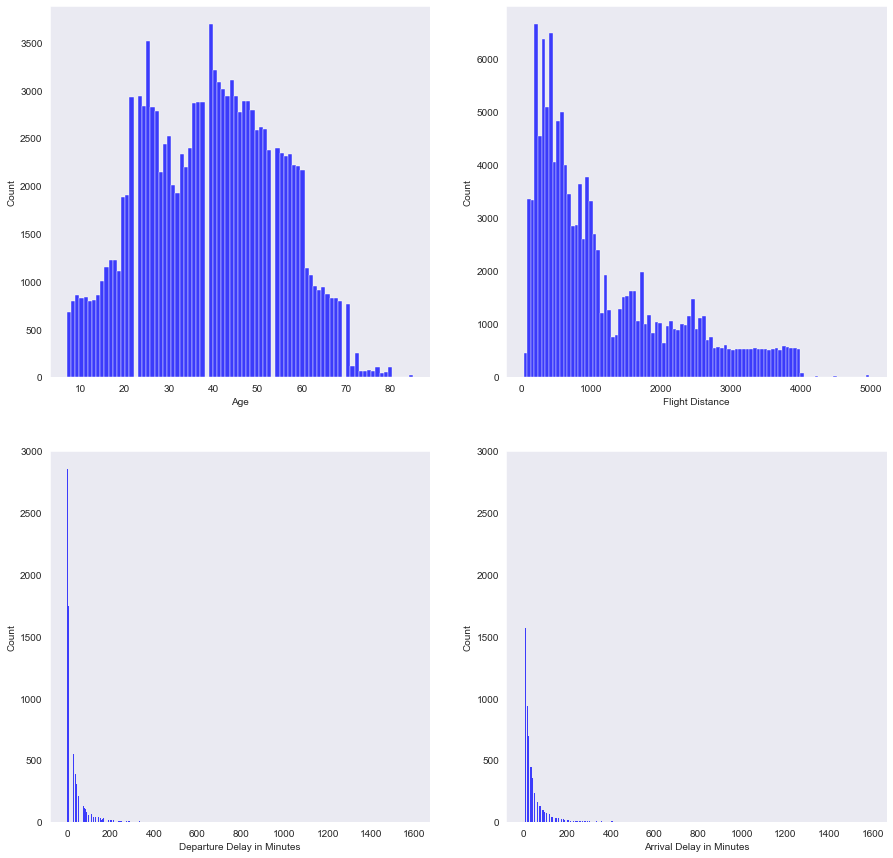

In [19]:
fig, ax = plt.subplots(2,2, figsize = (15,15))
sns.histplot(x = 'Age', data = df, ax = ax[0,0], color = 'b')
sns.histplot(x = 'Flight Distance', data = df, ax = ax[0,1], color = 'b')
sns.histplot(x = 'Departure Delay in Minutes', data = df, ax = ax[1,0], color = 'b')
sns.histplot(x = 'Arrival Delay in Minutes', data = df, ax = ax[1,1], color = 'b')
ax[1,0].set_ylim(0,3000)
ax[1,1].set_ylim(0,3000)
plt.show()

Age looks to be fairly normally distributed with no outliers upon closer examination.

We see that both the arrival and departure delay are heavily affected by a small amount of large values, most commonly 0 which is natural - most flights leave on time hence more often than not arrive on time also.

It's clear that Arrival and Departure Delay and Flight Distance have known outliers which require further examination

We have non-normal data so outlier detection approaches such as those that use the interquartile range do not work well - in fact due to the skew of the data - it suggested we needed to discard around 20% of the data based on the departure delay by minutes column which would lead to a major loss in information.

This is why we use bootstrapping to determine a much more suitable threshold for dropping outliers.

https://suplari.com/calculating-outliers-spend-data-bootstrapping/

We use a modified version of the code in the above link

Defining relevant bootstrap functions, we will firstly use these functions on Departure Delay in Minutes and Flight Distance, as Arrival Delay in Minutes requires closer examination due to missing values

In [20]:
# Takes a bootstrap sample
def bootstrap_sample(amounts):
    return np.random.choice(amounts, len(amounts), replace=True)

# Gets the 99th percentile
def percentile_99(sample):
     return np.percentile(sample, 99)

# creates a list of these 99th percentiles foor 1000 replicates
def bootstrap_confidence_interval(data):
    """
    Creates list of 10000 99th percentile bootstrap replicates. 
    """
    bs_samples = np.empty(1000)
    
    for i in range(1000):
        bs_samples[i] = percentile_99(bootstrap_sample(data))

    return bs_samples

In [21]:
dep_delay_bootstrap = df["Departure Delay in Minutes"].to_numpy()

percentiles_99th = bootstrap_confidence_interval(dep_delay_bootstrap)
np.percentile(percentiles_99th, 95)

183.0

Hence, anything with Departure Delays larger than this are considered outliers, which from the histogram, makes sense, removing these rows:

In [22]:
df.drop(index = df.loc[df['Departure Delay in Minutes'] > 183].index, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ['index'], axis = 1, inplace = True)

This only led to a loss in less than 1% of the data, given the sample size, this is negligible, similar approaches, conclusions and amount of loss of data also held for flight distance upon closer examination:

In [23]:
flight_distance_bootstrap = df["Flight Distance"].to_numpy()

percentiles_99th = bootstrap_confidence_interval(flight_distance_bootstrap)
np.percentile(percentiles_99th, 95)

3889.0

In [24]:
df.drop(index = df.loc[df['Flight Distance'] > 3889].index, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ['index'], axis = 1, inplace = True)

In [25]:
df.shape

(127437, 23)

It should be noted that, whilst code is omitted here, transformations were attempted to try and mend the strong skews in both arrival and departure delay in minutes, however this did not lead to better looking transformations. Transformations such as log transformations due to the presence of zeros also.

Now we have the final column of our data to deal with, Arrival Delay in Minutes, which has clear outliers but also missing values so therefore poses more problems.

It will be difficult to impute these sorts of values because we don't know what sorts of flights these are, if we did, we may be able to fill these based on how similar flights compared in terms of delay. We can't fill this with a random number as this will affect the model when it comes to training and prediction.

Furthermore, since this accounts for less than 0.5% of the data - and with the reasonings above - I felt it best to remove these rows

In [26]:
df.loc[df['Arrival Delay in Minutes'].isnull()].index
df.drop(index = df.loc[df['Arrival Delay in Minutes'].isnull()].index, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ['index'], axis = 1, inplace = True)

Now with no missing values, we now deal with outliers for the Arrival Time Delay:

Via our bootstrapping: this tells us values larger than 138 were deemed outliers which also made sense given the histogram:

In [27]:
arr_delay_bootstrap = df["Arrival Delay in Minutes"].to_numpy()
percentiles_99th = bootstrap_confidence_interval(arr_delay_bootstrap)
np.percentile(percentiles_99th, 95)

138.0

With such a miniscule loss in data, I found it best to remove rows with values larger than this, yielding similar conclusions to the previous two features

In [28]:
df.drop(index = df.loc[df['Arrival Delay in Minutes'] > 138].index, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ['index'], axis = 1, inplace = True)

### Re-checks

Verifying our data looks clean:

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,125863.0,39.399466,15.137101,7.0,27.0,40.0,51.0,85.0
Flight Distance,125863.0,1162.876946,963.329207,31.0,409.0,834.0,1718.0,3889.0
Inflight wifi service,125863.0,2.729309,1.329451,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,125863.0,3.058063,1.527909,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,125863.0,2.755933,1.401248,0.0,2.0,3.0,4.0,5.0
Gate location,125863.0,2.975775,1.277915,0.0,2.0,3.0,4.0,5.0
Food and drink,125863.0,3.207901,1.329885,0.0,2.0,3.0,4.0,5.0
Online boarding,125863.0,3.247992,1.351103,0.0,2.0,3.0,4.0,5.0
Seat comfort,125863.0,3.440964,1.319726,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,125863.0,3.357285,1.336023,0.0,2.0,4.0,4.0,5.0


In [30]:
df.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

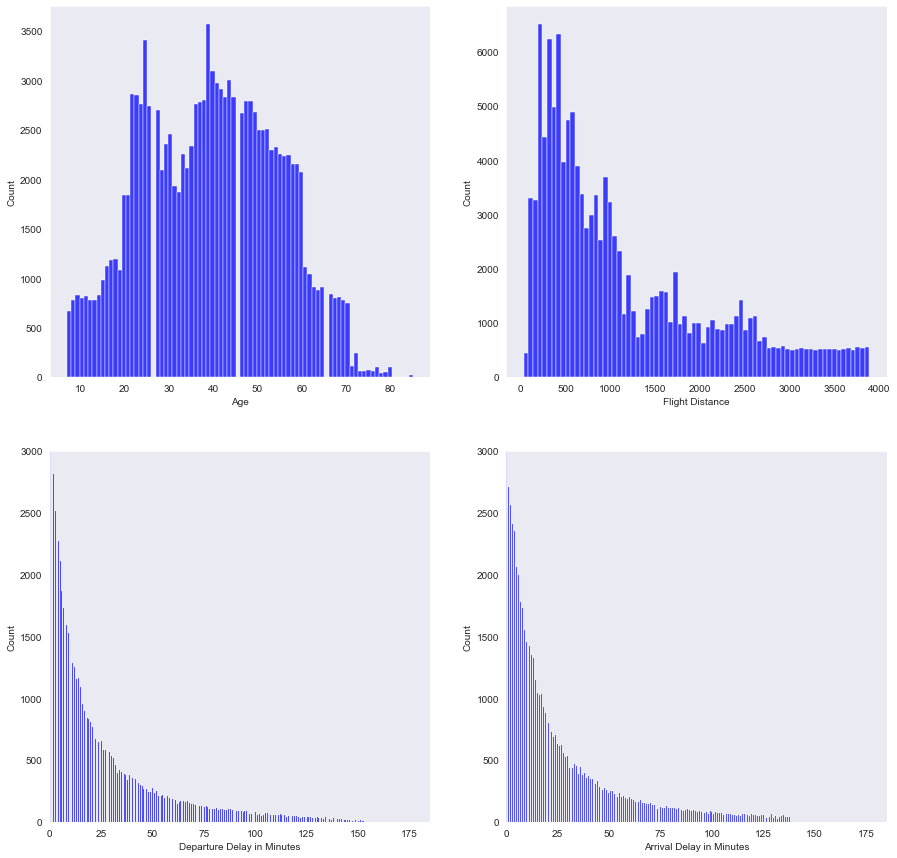

In [31]:
sns.set_style()
fig, ax = plt.subplots(2,2, figsize = (15,15))
sns.histplot(x = 'Age', data = df, ax = ax[0,0], color = 'b')
sns.histplot(x = 'Flight Distance', data = df, ax = ax[0,1], color = 'b')
sns.histplot(x = 'Departure Delay in Minutes', data = df, ax = ax[1,0], color = 'b')
sns.histplot(x = 'Arrival Delay in Minutes', data = df, ax = ax[1,1], color = 'b')
ax[1,0].set_xlim(0,185)
ax[1,0].set_ylim(0,3000)
ax[1,1].set_xlim(0,185)
ax[1,1].set_ylim(0,3000)

plt.show()

The data looks much more better or clean. The major skews in some numerical features however could cause problems in predictive performance however in terms of processing.

### Checking for Imbalances

As we will be modelling the data towards the end to predict satisfaction, it is best to check if there are imbalances in the data:

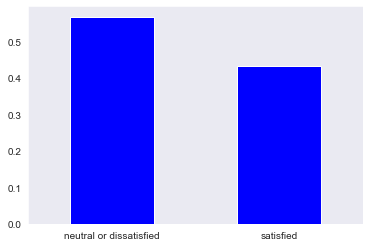

In [32]:
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color = 'b')
plt.xticks(rotation = 0)
plt.show()

There is roughly a 45% Satisfied and 55% Neutral/Dissatisfied split suggesting a slight imbalance, but nothing major so no sampling techniques e.g. SMOTE need to be carried out

### Encoding Features

In [33]:
# To make data more easier to deal with
Gender1 = pd.get_dummies(df['Gender'],drop_first=True)
CustomerType1 = pd.get_dummies(df['Customer Type'],drop_first=True)
TravelType1 = pd.get_dummies(df['Type of Travel'],drop_first=True)
satisfied1 = pd.get_dummies(df['satisfaction'], drop_first = True)
df['Class'] = df['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
df = pd.concat([df, Gender1, CustomerType1, TravelType1, satisfied1],axis =1) 
df.drop(['Gender','Customer Type','Type of Travel', 'satisfaction'],inplace =True,axis = 1) 

# FOR QUESTION 3 LATER
df_copy = df.copy(deep = True)

## Exploratory Data Analysis

### Univariate Analysis

Considering firstly the non-numerical features:

In [34]:
#categoricals = ['Class', 'Inflight wifi service',
       #'Departure/Arrival time convenient', 'Ease of Online booking',
       #'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       #'Inflight entertainment', 'On-board service', 'Leg room service',
       #'Baggage handling', 'Checkin service', 'Inflight service',
       #'Cleanliness', 'Male', 'loyal', 'personal']

In [35]:
#for categories in categoricals:
 # plt.figure(figsize=(16,6))
  #plt.subplot(1,1,1)
  #sns.countplot(x=df[categories], color = 'b')
 #plt.show()

**NOTE TO MARKER** 

ABOVE CODE HAS BEEN OMITTED AS THERE IS A LOT OF PLOT OUTPUT WHICH IS REPETITIVE AND CAN MAKE NAVIGATION DIFFICULT - I HAVE GIVEN A SUBSET BELOW:

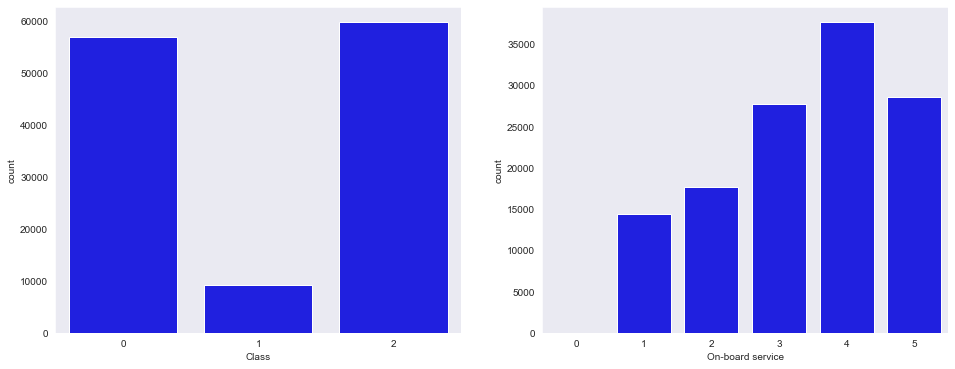

In [36]:
categoricals1 = ['Class', 'On-board service', 'loyal']
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(x = df['Class'], color = 'b', ax = ax[0])
sns.countplot(x = df['On-board service'], color = 'b', ax = ax[1])
plt.show()

Things to note from this:
- Very high amounts of Eco and Business Passengers compared to Eco Plus - which could possibly lead to poor classifications from those in the minority class
- There are roughly equal proportions of males and females
- There is a huge difference in the ratio of loyal to disloyal customers in the dataset
- We have, in our dataset, more people travelling for business rather than a personal trip e.g. a holiday
- Many categorical variables look fairly varied in terms of counts. with some showing increasing trends for higher ratings for example Seat Comfort

These are just initial views on the data.

### Correlation Analysis

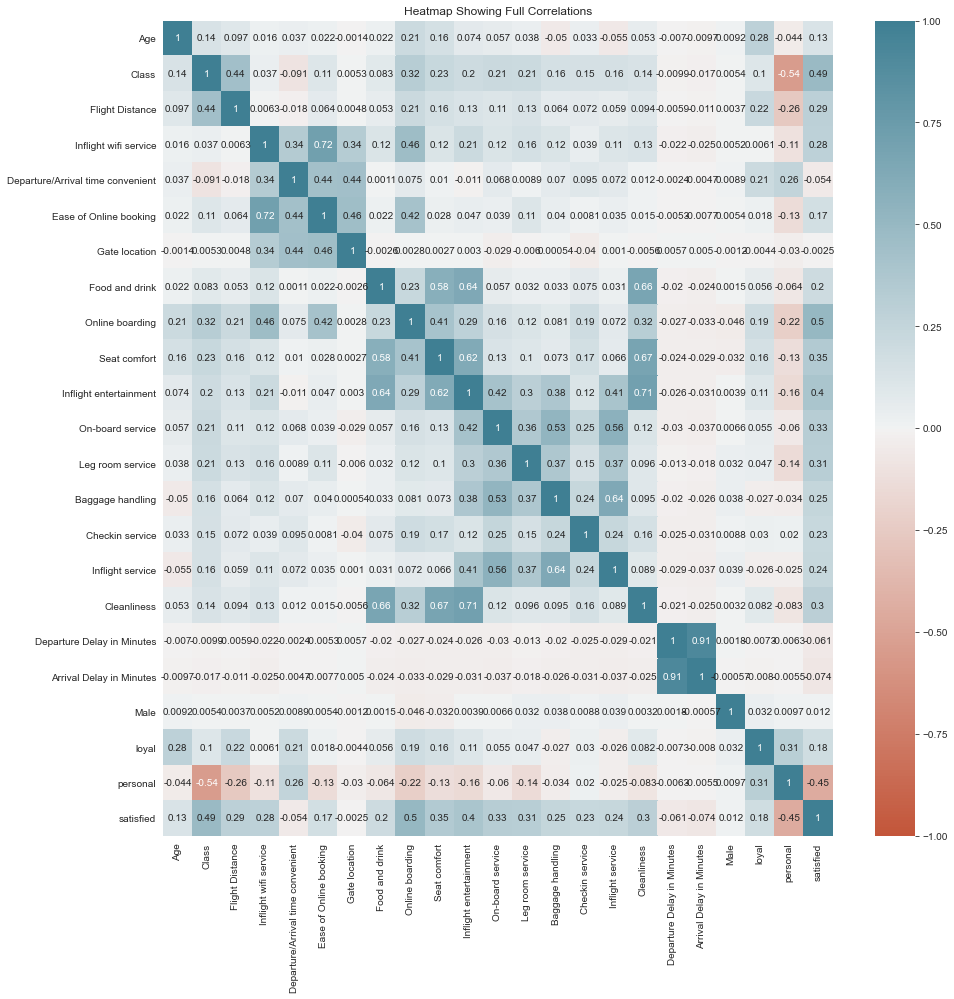

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = sns.diverging_palette(20, 220, as_cmap=True), annot = True, 
            vmin = -1, vmax = 1, center = 0)
plt.title('Heatmap Showing Full Correlations')
plt.show()

As we can see here, Departure Delay in Minutes and Arrival Time in Minutes are very highly correlated. 

- One could have fit a regression line between the two and used it to fill in the missing values for the Arrival Time in Minutes.

Nonetheless, because the two columns are highly correlated, and with the aim of avoiding multicollinearity, we only require one of these columns. I have chosen to drop Arrival Delay in Minutes.

One can also notice some groupings or chunks of features which seem to be correlated with eachother.

1. Inflight Wifi Service, Departure/Arrival Convenient, Ease of Online Booking and Gate Location
2. Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, and Cleanliness
3. Inflight Entertainment, Onboard Service, Leg Room, Baggage Handling, Inflight Service

These look like they naturally group into the following groups: Convenience, Comfort and Service respectively. Further Analysis of this can be found in the part of this notebook pertaining to Question 3

Aside from these relations, remaning features don't seem to be related to eachother.

Dropping Arrival Delay in Minutes:

In [38]:
df.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)

Visualizing direct correlations with Satisfaction:

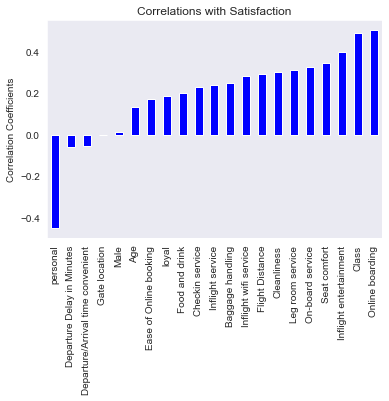

In [39]:
df.corr()['satisfied'].sort_values().drop('satisfied').plot(kind='bar', color = 'b')
plt.title('Correlations with Satisfaction')
plt.ylabel('Correlation Coefficients')
plt.show()

Online boarding, Class and Type of Travel seems to have the strongest correlation to satisfaction - although most features have a moderate correlation with satisfaction

Given that we have moderate correlations between several **individual** variables with the response, we could assume that when it comes to prediction, we expect very good results in terms of accuracy metrics which is great to know

### Question 1: Age and Gender

From the correlation heatmap, age is uncorrelated with all features and satisfaction. To further examine age, given that is fairly Gaussian, lets split this into four quartiles and see how age groups perform against satisfaction:

In [40]:
df['AgeGroup'] = pd.qcut(x = df.Age, q = 4)

In [41]:
df[['AgeGroup',"satisfied"]].groupby(['AgeGroup']).mean().sort_values(by="satisfied", ascending=False)

,satisfied
AgeGroup,
"(40.0, 51.0]",0.579037
"(51.0, 85.0]",0.450465
"(27.0, 40.0]",0.421289
"(6.999, 27.0]",0.292198


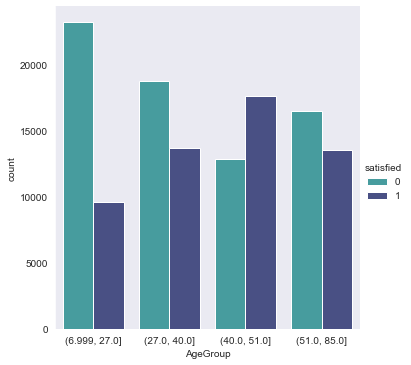

In [42]:
sns.catplot(x = 'AgeGroup', data = df, hue = 'satisfied', kind = 'count', palette = 'mako_r')
plt.show()

- We see that the more middle aged passengers specifically between the ages 40 and 51 tend to be more satisfied, but for the remaining age groups, the amount of neutral/dissatisfaction is significantly higher than the satisfaction count.

However, the fact that, that specific age group looks more satisfied may just be a quirk of the way we split the feature so is still inconclusive.

Lets examine how the bivariate distributions of age groups with other features vary whilst accounting for satisfaction:

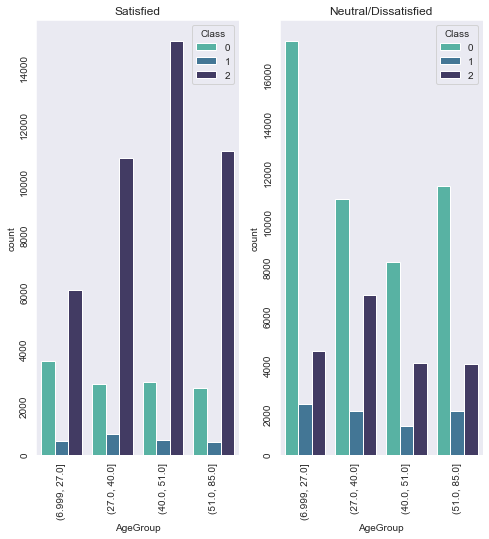

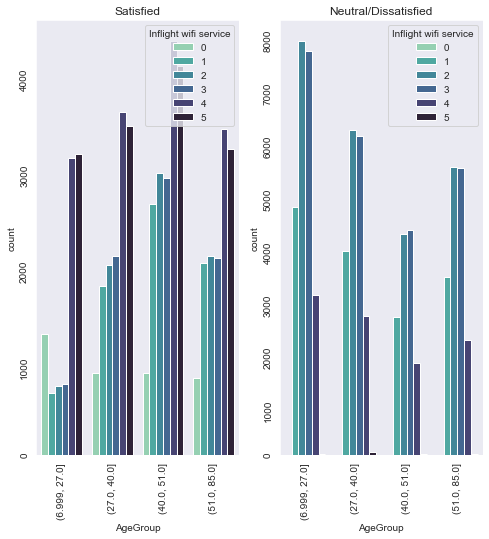

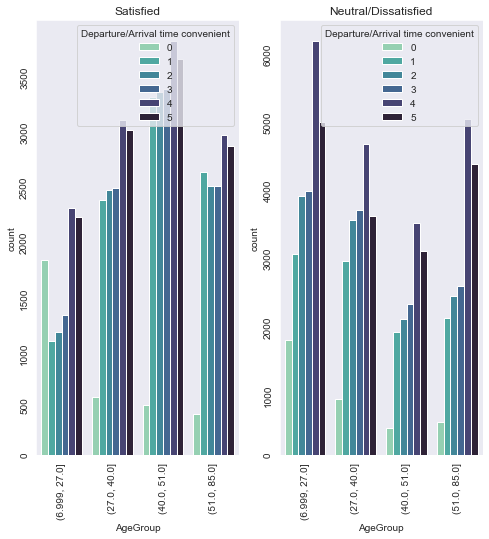

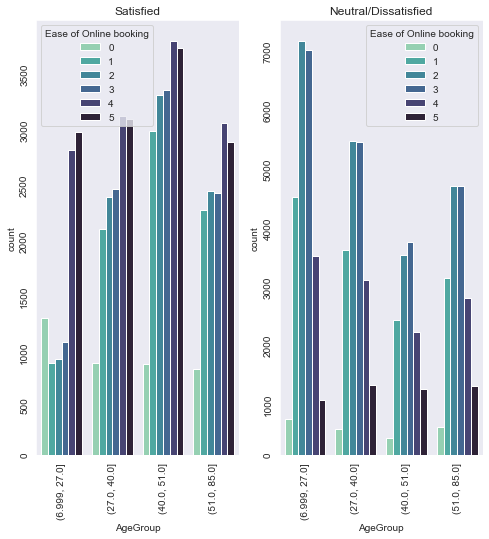

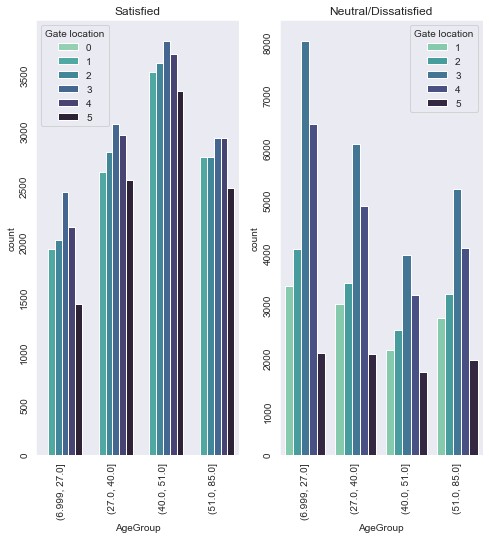

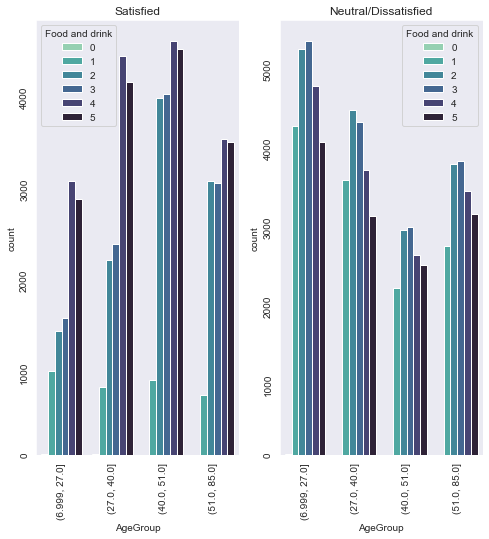

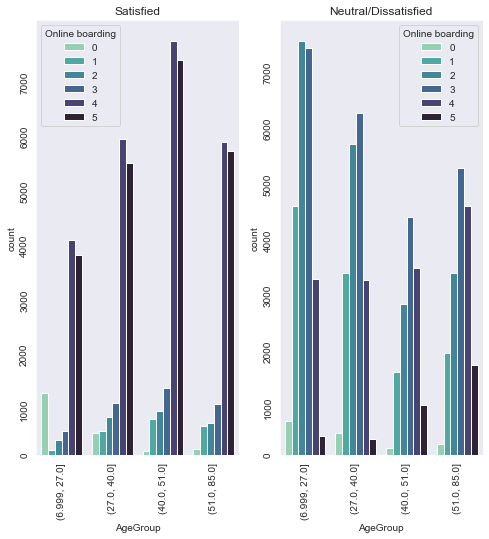

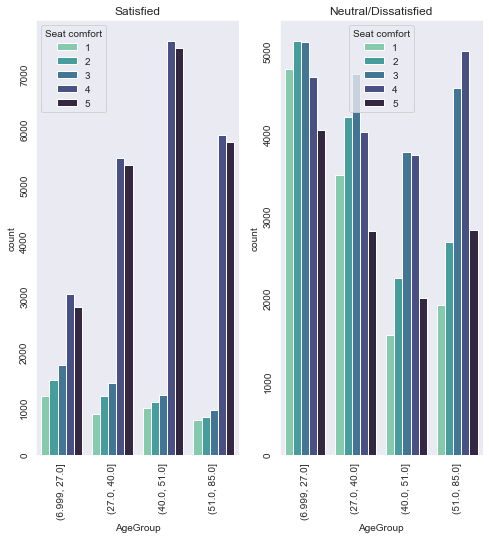

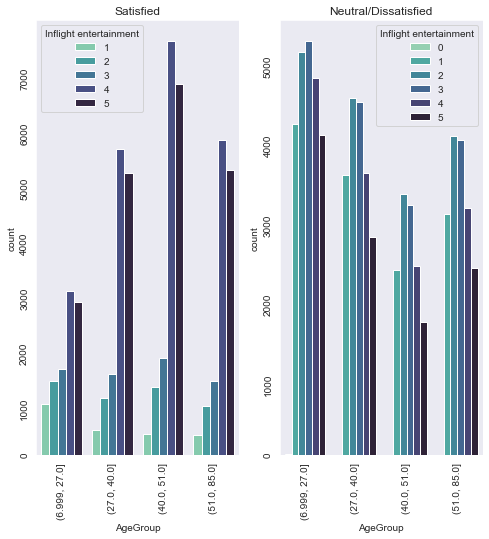

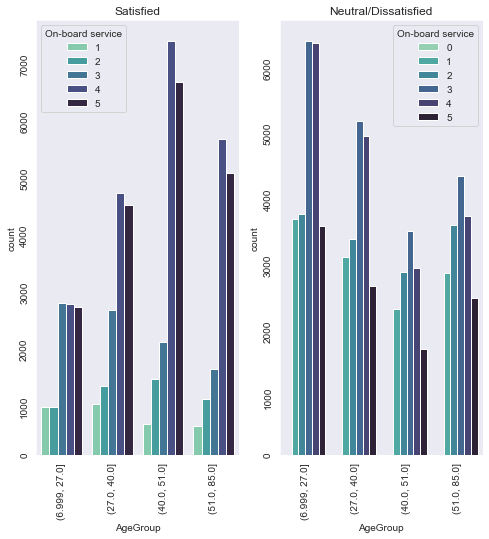

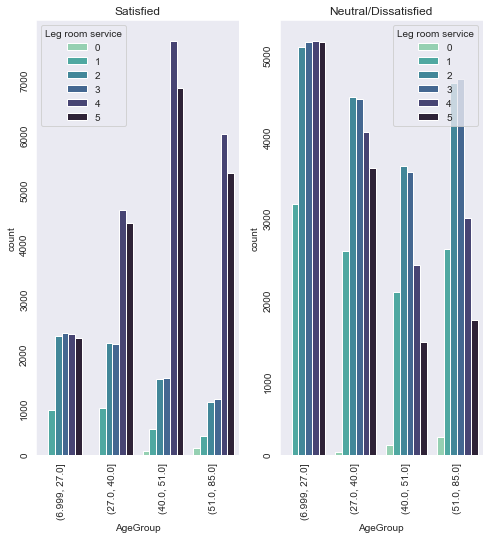

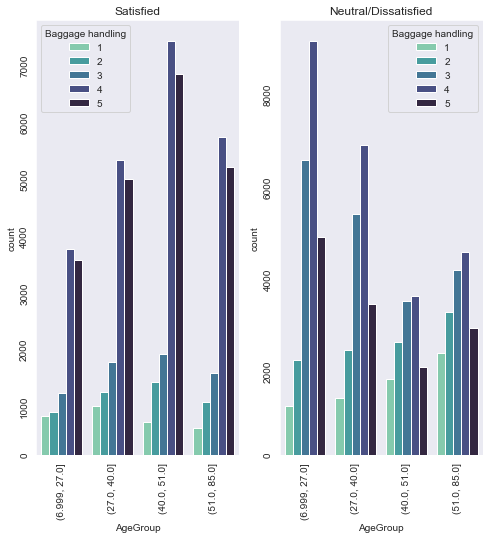

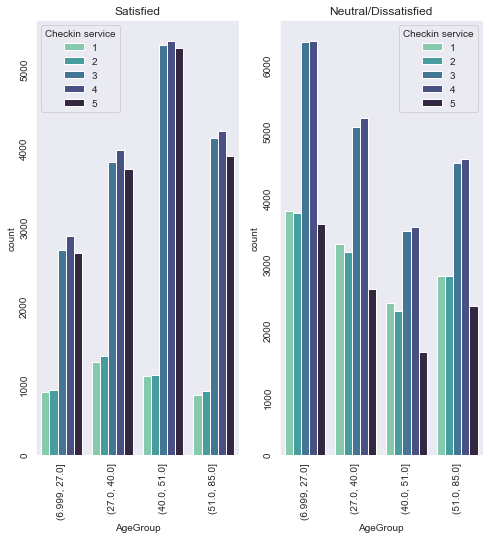

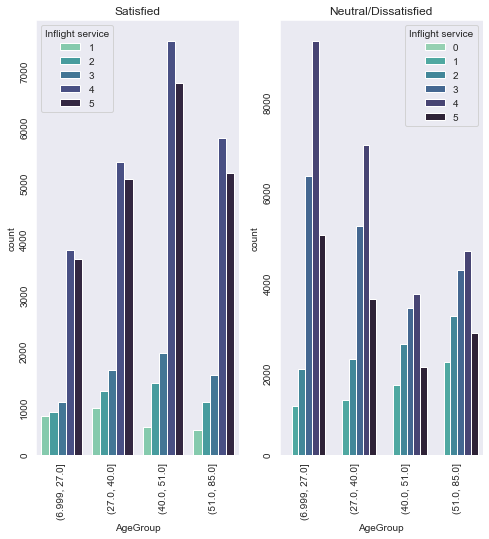

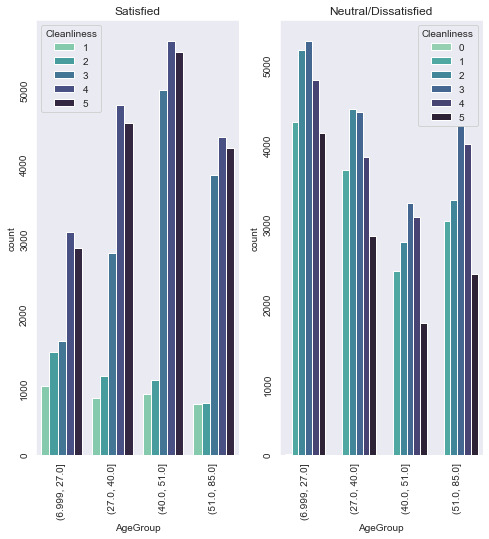

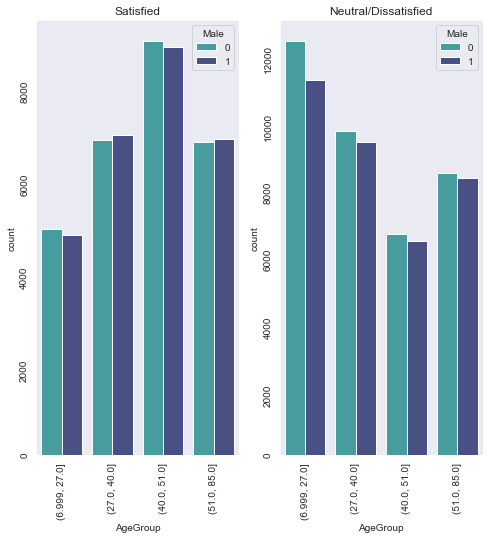

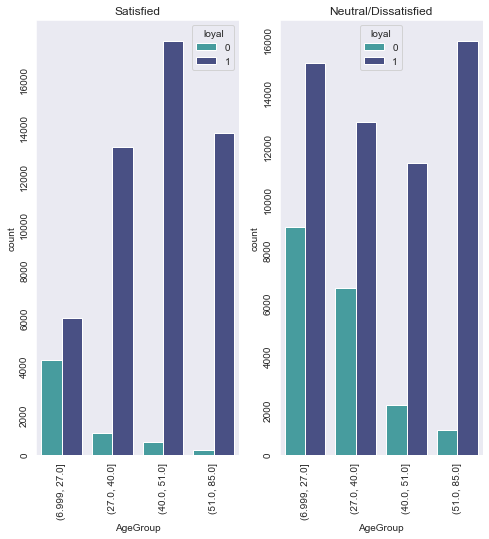

In [43]:
# satisfied and unsatisfied passengers
satisfied_p = df[df['satisfied'] == 1]
unsatisfied_p = df[df['satisfied'] == 0]

categoricals = ['Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Male', 'loyal']

for i in categoricals:

  f, axes = plt.subplots(1, 2, figsize=(8, 8))
  sns.countplot(x = 'AgeGroup', data = satisfied_p, hue = i, ax = axes[0], palette = 'mako_r')
  axes[0].set_title('Satisfied')
  axes[0].tick_params(labelrotation = 90)
  sns.countplot(x = 'AgeGroup', data = unsatisfied_p, hue = i, ax = axes[1], palette = 'mako_r')
  axes[1].tick_params(labelrotation = 90)
  axes[1].set_title('Neutral/Dissatisfied')

- We've split the data by satisfaction and looked at the distributions of all the categorical variables based on age group. We can see that for all age groups across both levels of satisfaction, all other features showed no changes in distribution
- This answers our first main question - we have the in general middle-aged people tend to be more satisfied, however age in general does not seem to be related to satisfaction, so this fact is just a quirk of the data.

- Age
 - Doesn't have any correlation with satisfaction via correlation heatmap
 - Doesn't have any correlation to features via correlation heatmap
 - Doesn't have any relationships with features even after accounting for satisfaction
 - Conclusion: DROP
 
 Thus answering the first part of Question 1

**NOTE TO MARKER:**

For Gender - the exact same process was carried out except it need not need grouping since its discrete. I have omitted to code due to sheer amount output seen seen above for Age. This would make for a lot of scrolling and navigating hence omitted for convenience.

Gender:
 - Doesn't have any correlation with satisfaction via correlation heatmap
 - Doesn't have any correlation to features via correlation heatmap
 - Doesn't have any relationships with features even after accounting for satisfaction
 - Conclusion: DROP
 
This answers Question 1 of our analysis - personal demographical factors do not contribute to passenger satisfaction for our dataset

Dropping these features:

In [44]:
df.drop(['Age', 'Male'], axis = 1, inplace = True)
#Dropping age groups also
df.drop('AgeGroup', axis = 1, inplace = True)

### Question 2: Analysis of Class

First lets consider how proportions of satisfaction vary per class:

In [45]:
df.groupby('Class')['satisfied'].mean()

Class
0    0.188520
1    0.247552
2    0.694177
Name: satisfied, dtype: float64

We can see class indeed has an effect on satisfaction answering the first part of our question. We saw an expected increase in satisfaction as the class of a passenger increased in tiers (Eco to Eco Plus to Business), from 19% to 25% to 70% respectively. Whilst this is natural - its a huge leap in satisfaction - it raises the question, why are most business class passengers satisfied, and why are most economy passengers dissatisfied? What are the factors that distinguish between the two classes? This is the second part of our question!

To answer this question, we require further analysis - we only consider differences between Eco and Business, and omit Eco Plus, for a few reasons, the first being that the difference in satisfaction between Eco and Eco Plus is small, about 5% so they're in a sense very similar (if comparing to Business), another reason is that Economy and Business have roughly the same number of observations, whilst the number of observations for Eco Plus passengers is significantly lower so wouldn't be a fair comparison

In [46]:
# extracting only Eco and Business Passengers - 0 = Economy and 1 = Business
df1 = df[df['Class'].isin([0, 2])]

As a very very brief overview, i.e. it doesn't tell the full story, we could group by class and look at the average for each feature to see if we note some differences

In [47]:
df1.groupby('Class').aggregate('mean')

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,loyal,personal,satisfied
Class,,,,,,,,,,,,,,,,,,,
0,740.890692,2.675165,3.193401,2.604822,2.969201,3.097438,2.810708,3.143532,3.097930,3.119335,3.075383,3.447260,3.125639,3.476391,3.105340,11.113909,0.766124,0.566507,0.188520
2,1629.902753,2.776405,2.905850,2.914205,2.983156,3.326519,3.720849,3.766057,3.640664,3.689438,3.641685,3.845205,3.522001,3.854866,3.480427,10.648617,0.848553,0.043735,0.694177


In general, or on average 
- Business Passengers flew longer flights
- Business Passengers rated higher for online boarding, seat comfort, onboard service, leg room service, checkin service, inflight service, and had more cleanliness in comparison to Eco passengers
 - These initial findings are naturally expected as in general you pay for Business Class for better services
- Essentially all business travellers travelled for business reasons in comparision of Eco passengers where it was more evenly split
- Many of the other features were fairly similar between the two

However this is a bad comparison as these averages combine **both** satisfied and dissatisfied passengers

A better approach to take is to split by satisfaction levels, taking into account only satisfied passengers to make things more representative and then examine the bivariate distributions of both classes amongst all the other features

Lets look at comparisons to categorical features first:

**NOTE TO MARKER:**

Again due to larger summary output full of many repetitive plots - I've commented out above code, however a sample of two plots has been below

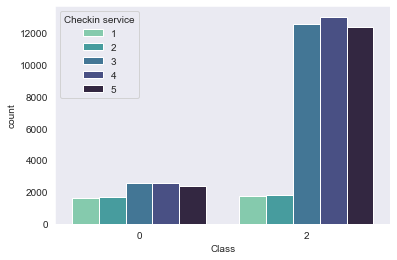

In [48]:
categoricals1 =['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

satisfied_p = df1[df1['satisfied'] == 1]

sns.countplot(x = 'Class', data = satisfied_p, hue = 'Checkin service', palette = 'mako_r')
plt.show()

#for i in categoricals1:
  #f, axes = plt.subplots(1, 1, figsize=(8, 8))
  #sns.countplot(x = 'Class', data = satisfied_p, hue = i)
  #plt.title('Satisfied Passengers Only')

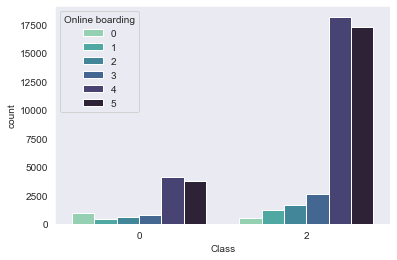

In [49]:
sns.countplot(x = 'Class', data = satisfied_p, hue = 'Online boarding', palette = 'mako_r')
plt.show()

Assessing the distributions:
- Inflight Wifi Service: For Satisfied Passengers - the ratings were fairly varied for business class meaning this wasn't important for them, unlike Eco Passengers where it was
- Departure/Arrival time convenient - very varied for both classes- not important to satisfaction for both classes
- Ease of Online Booking - was fairly varied for satisfied business meaning it wasn't an important factor for them, however, this was important for Eco Passengers
- Gate Location - not very important for both classes (very varied)
- Food and Drink - equal importance for both classes (very similar distributions, both had spikes for high ratings) - although still varied
- Online boarding - important factor for both classes, large amount of ratings of 4-5
- Seat Comfort - Very important for business class, but still slightly important for Eco
- Inflight Entertainment - same conclusions as Seat Comfort
- Onboard Service - very important for Business, but not Eco
- Leg Room Service - very important for Business Class, not so much Eco
- Baggage Handling - Slightly important for Eco, but very for Business
- Check-in Service - not important for Eco, but very for Business
- Inflight Service - Slightly important to Eco, but very for Business
- Cleanliness - Equal importance

Important for each class:
- Eco:
 - Inflight Service, Ease of Online Booking, Food and Drink, Online Boarding, Seat Comfort (slightly), Inflight Entertainment (slightly), Baggage Handling (slightly), Inflight Service (slightly) Cleanliness
- Business- Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, Onboard Service, Leg Room, Baggage Handling, Check-In Service, Inflight Service and Cleanliness

Hence, what we see is that - for Business Passengers more factors are important to them to be satisfied in comparison to those in Economy Class.

What the two classes hold **equally important** to them are: Food and Drink, Online Boarding and Cleanliness

**The additional factors that hold significantly more importance to Business Class Passengers than Eco ones are:** Seat Comfort, Inflight Entertainment, Onboard Service, Leg Room, Baggage Handling, Check-In Service, Inflight Service

So it, as expected, takes more to please Business Class passengers!

The remaining features, gate location and departure/arrival time convenient held no importance to either class which will be further analyzed in question 3.

We have now answered Question 2.

### Question 3 - Most Important Features

#### Categorical Features

Let's first initially look at how the proportions of satisfaction varied per rating for all categorical features

In [50]:
categoricals = ['Class', 'Inflight wifi service','Departure/Arrival time convenient',
                'Ease of Online booking','Gate location','Food and drink','Online boarding',
                'Seat comfort','Inflight entertainment','On-board service','Leg room service',
                'Baggage handling','Checkin service','Inflight service','Cleanliness','loyal']

In [51]:
for i in categoricals:
    print(df[[i,"satisfied"]].groupby([i]).mean())         

       satisfied
Class           
0       0.188520
1       0.247552
2       0.694177
                       satisfied
Inflight wifi service           
0                       0.997366
1                       0.325323
2                       0.245704
3                       0.249238
4                       0.599183
5                       0.990243
                                   satisfied
Departure/Arrival time convenient           
0                                   0.479448
1                                   0.488257
2                                   0.444348
3                                   0.437546
4                                   0.386233
5                                   0.423499
                        satisfied
Ease of Online booking           
0                        0.665639
1                        0.377236
2                        0.301814
3                        0.307515
4                        0.529394
5                        0.736552
               sati

We can draw the following from this output about DIRECT relations to satisfactions:
- Around half of loyal passengers seem to be satisfied with only a quarter for unloyal passengers 
- An interesting statistic is that a very small proportion of those on personal trips are satisfied, and those who fly for business purpose are more likely to be satisfied (could require further investigation!)
- Those in business class tend to be more satisfied (around 70% of passengers), with economy plus passengers less satisfied and economy passengers even less. This was investigated earlier
- Inflight Wifi Service seems related to satisfaction because ignoring the 0 rating, we observe an increasing trend in satisfaction
- The departure/arrival time convenience doesn't also seem to be related to satisfaction, with roughly similar proportions of satisfaction for all ratings, although the correlation suggested this is related to many other features
- Ease of Online Booking seems to be related to satisfaction, as higher ratings led to higher proportions of satisfaction
- Gate Location doesn't seem to have much of a relationship - also supported from correlation plots but also showed correlations with many other features
- Food and Drink seems to have increasing satisfaction as rating increases, interesting to note even those who gave it the lowest rating had 50% satisfaction
- Online Boarding has an increasing trend, although more than half of passengers who rated it 0 were satisfied
- Seat Comfort and Inflight Entertainment clearly have a direct relationship with satisfaction
- Also onboard service, leg room service, baggage handling, check-in service, in-flight service and cleanliness show some trends with satisfaction

Whilst we've managed find information that supports our earlier bar chart correlation plots, we've also now identified many relations within different features and how it affected satisfaction!

Features above which showed direct trends with satisfaction, are enough to suggest that they are related to satisfaction and are thus important.

Features that require further investigation:
- Gate Location
- Departure/Arrival time convenient

Notice that the these were the same two services not important to either Economy of Business Class passengers earlier! We have reason to suspect they're not important

Let's consider Departure/Arrival Time Convenient - using similar approaches to previous questions, lets examine if we notice changes in bivariate distributions after accounting for satisfaction:

**NOTE TO MARKER:**

Again, in the interest of avoiding many repetitive plots, I have omitted the code here, however this is the EXACT same process used in Question 1 with Age (without the grouping as these feature are discrete).

Departure/Arrival Time Convenient:
 - Doesn't have any correlation with satisfaction via correlation heatmap
 - Showed some direct correlation with some other features via correlation heatmap
 - However, no changes were observed in the bivariate distribution with all other features when accounting for satisfaction
 - Conclusion: DROP
 
Gate Location:
 - Doesn't have any correlation with satisfaction via correlation heatmap
 - Showed some direct correlation with some other features via correlation heatmap
 - However, no changes were observed in the bivariate distribution with all other features when accounting for satisfaction
 - Conclusion: DROP

In [52]:
df.drop(['Departure/Arrival time convenient', 'Gate location'], axis = 1, inplace = True)

#### Numerical Features

The only remaining numerical features we have left are fight distance and departure delay in minutes. Let's first look at a histogram of flight distance accounting for satisfaction:

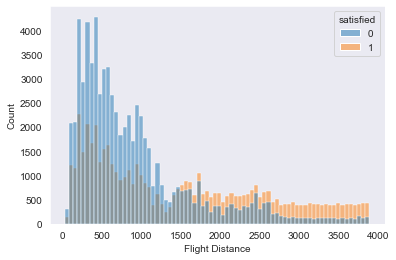

In [53]:
sns.histplot(x = 'Flight Distance', data = df, hue = 'satisfied')
plt.show()

We see a relationship between Flight Distance and Satisfaction - we have significantly more neutral/dissatisfied passengers in the shorter haul flights and satisfied passengers are much more evenly spread out across all distances with more passengers being satisfied on longer trips.

Whilst we cannot investigate why due to lack of data, on could hypothesize that longer haul trips have better model planes and therefore better facilities.

This is enough to suggest its importance in satisfaction.

Let's now consider Departure Delay in Minutes. Due to how skewed this is, it would be hard to understand once split by satisfaction, so a KDE plot is used:

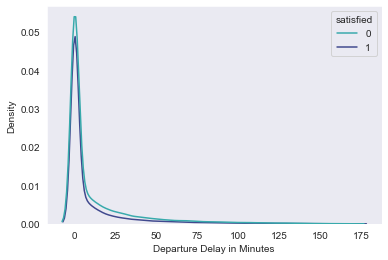

In [54]:
sns.kdeplot(x = 'Departure Delay in Minutes', data = df, hue = 'satisfied', palette = 'mako_r')
plt.show()

We notice that there doesn't seem to be a relationship with Departure Delay in Minutes with Satisfaction, however, before discarding we must consider further relationships i.e. the examination of the bivariate distribution of this feature with all other features accounting for satisfaction:

**NOTE TO MARKER:**
Again, in the interest of omitted many repetitive plots, I have omitted the code here, however this is the EXACT same process used in Question 1 with Age (with grouping).

Departure Delay in Minutes:
 - Doesn't have any correlation with satisfaction via correlation heatmap
 - Doesn't show correlations with any other features via correlation heatmap
 - No changes were observed in the bivariate distribution with all other features when accounting for satisfaction
 - Conclusion: DROP
 
 Thus leaving us with a single numerical feature in the data.
 
 Overall, we have identified all features that are important in determining passenger satisfaction, where from the original dataset, we've removed a total of 8 features.

In [55]:
df.drop('Departure Delay in Minutes', axis = 1, inplace = True)

#### Possible Groupings? (Feature Engineering)

Recall, in the correlation analysis section - we identified some groupings in features - within these groupings contained features we have dropped as we deemed them irrelevant. Whilst we've removed features from the main dataset, by grouping, the features we dropped may contribute to satisfaction once combined with other features.

I'll repeat the groupings here:

- Inflight Wifi Service, Departure/Arrival Convenient, Ease of Online Booking and Gate Location
- Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, and Cleanliness
- Inflight Entertainment, Onboard Service, Leg Room, Baggage Handling, Inflight Service

What I'll do is create a second dataframe but with these groupings (by taking the mean values of the ratings) and compare these two dataframes in terms of predictive performance further down the line

(we created a copy of the wrangled and cleandataset earlier!)

In [56]:
df_copy.drop(['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Male'], axis = 1,
            inplace = True)

df_grouped = df_copy.copy(deep = True)
df_grouped['Convenience'] = df_grouped[['Inflight wifi service','Departure/Arrival time convenient',
                                      'Ease of Online booking', 'Gate location']].mean(axis=1)
df_grouped['Comfort'] = df_grouped[['Food and drink','Online boarding','Seat comfort', 
                                        'Inflight entertainment', 'Cleanliness']].mean(axis=1)
df_grouped['Service'] = df_grouped[['Inflight entertainment','On-board service',
                                        'Leg room service', 'Baggage handling',
                                 'Inflight service']].mean(axis=1)
df_grouped.drop(['Inflight wifi service','Departure/Arrival time convenient',
                       'Ease of Online booking', 'Gate location', 'Food and drink',
                       'Online boarding','Seat comfort', 'Inflight entertainment', 
                       'Cleanliness',
                       'On-board service','Leg room service', 'Baggage handling', 'Inflight service'], 
                axis=1,inplace=True)

So we now have 2 dataframes: one with 16 features, and the other with 9, compared to when we started with 24 features which both look to be a great improvement!

We have now answered Question 3

### Scaling Data

For clustering (we'll be used K-Means Later) and for modelling, many clustering techniques and models (distance based ones) are sensitive to scale. Due to varying magnitudes in our data, we need to carry out scaling.

The MinMaxScaler from sklearn is chosen as scaling of ratings going from 1-5 become 0, 0.2, 0.4 .. 1, and hence stll remains interpretable, also because binary features remain invariant and also due to the non-normality of Flight Distance.

Applying this to both our proposed dataframes:

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
# ungrouped data
df_mm = df.copy(deep = True)
scaler = MinMaxScaler()
df_mm = pd.DataFrame(MinMaxScaler().fit_transform(df_mm), index = df.index, columns = df.columns)

In [59]:
# grouped data
df_grouped_mm = df_grouped.copy(deep = True)
scaler = MinMaxScaler()
df_grouped_mm = pd.DataFrame(MinMaxScaler().fit_transform(df_grouped_mm),
                             index = df_grouped.index, columns = df_grouped.columns)

## Question 4 - Clustering

### Introduction

Next, we move onto our next question of our analysis. Of our **satisfied** passengers, is it possible to identify any subgroups within it? For example for one group of satisfied passengers, are there some factors more important to them compared to another group.

The way we can assess this, is the use of clustering.

I have chosen to use K-Means Clustering for various reasons, for example, guaranteed convergence, it still works well with relatively large datasets and is relatively easy to implement.

The plan is to extract all satisfied passengers, using our scaled data and carry out clustering. When we look at observations within clusters, these will show the scaled forms of observations, therefore, for each cluster, we'll transform these observation back into their original form after clustering to allow for an interpretable analysis

NOTE: I have chosen to use the full scaled dataset rather than the grouped version, as we don't know yet how these grouped feature engineered variables perform.

The question we now need to determine, is how many clusters to use. There are various methods to use. Two very common heuristics are the elbow method and the examination of the average silhouette score for varying number of clusters. There are also silhouette plots too.

We'll be focusing on the first two for now, to make a well-informed decision on how many clusters to take. (These are only heuristics - no hard and fast way to determine the best number of clusters)

In [60]:
random_seed = 2

# extracting satisfied passengers
df_mm_sat = df_mm[df_mm['satisfied'] == 1]

#dropping satisfied - do not want this taken into account in clustering - doesn't help either, all
#equal to one
df_mm_sat = df_mm_sat.drop('satisfied', axis = 1)

### Elbow Plot

In [61]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def elbow(df):
    # stores within group sum of squares
    withingroup_sos = []
    #iterating over each number of clusters
    K = range(1,10)
    for k in K:
        #at each clusters getting the total within cluster sum of squares using cluster centers
        # (centroids)
        kmeanModel = KMeans(n_clusters = k, random_state = 2).fit(df)
        withingroup_sos.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                                            'euclidean'), axis = 1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, withingroup_sos, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within groups sum of squares')
    plt.title('Elbow Plot')
    plt.show()

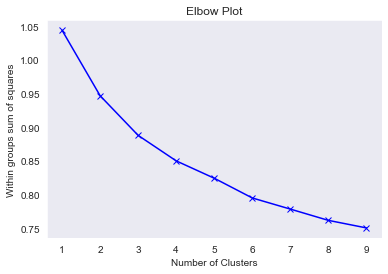

In [62]:
elbow(df_mm_sat)

This suggests about 3 clusters - looking for where the 'kink' is

### Average Silhouette Score

Finding the average silhouette score for varying numbers of clusters is an intense piece of code for large datasets, hence we take a sample of our relevant dataset:

In [63]:
df_mm_sat_sample = df_mm_sat.sample(15000, random_state=random_seed)

In [64]:
from sklearn.metrics import silhouette_score

# Calculation of average silhouette scores per cluster

range_of_clusters = list(range(2,8)) 
for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters = n_clusters)
    preds = kmeans.fit_predict(df_mm_sat_sample)
    score = silhouette_score(df_mm_sat_sample, preds)
    print ("For %d clusters, average Silhouette score is %.2f" % (n_clusters, score))

For 2 clusters, average Silhouette score is 0.27
For 3 clusters, average Silhouette score is 0.14
For 4 clusters, average Silhouette score is 0.15
For 5 clusters, average Silhouette score is 0.14
For 6 clusters, average Silhouette score is 0.16
For 7 clusters, average Silhouette score is 0.17


So, our Elbow Plot suggests 3 clusters for both datasets. Using average silhouette scores would suggest that taking 2 clusters is better

Let's look at both and see the differences:

### K-Means Clustering

Following the steps we mentioned in the introduction:

2 clusters (including calculation of number of observations in each cluster):

In [65]:
kclusters = 2

#clustering performed
kmeans = KMeans(n_clusters = kclusters, random_state = random_seed).fit(df_mm_sat)
print(np.bincount(kmeans.labels_))

#cluster labels taken as well as index
clusters = pd.DataFrame({'index' : df_mm_sat.index.values, 'cluster_label': kmeans.labels_})

# then rows for each cluster extracted from entire original dataframe
cluster0_index = clusters[clusters['cluster_label'] == 0]['index']
cluster0 = df.loc[cluster0_index, :].mean().to_frame().T

cluster1_index = clusters[clusters['cluster_label'] == 1]['index']
cluster1 = df.loc[cluster1_index, :].mean().to_frame().T

KMeans_Table = pd.concat([cluster0, cluster1], 
          axis = 0).reset_index().drop(['index'], axis = 1)

KMeans_Table

[41593 12877]


,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,loyal,personal,satisfied
0,1.991249,1736.175895,2.947852,2.973649,3.519871,4.136802,4.108456,4.073666,4.046739,3.998101,4.139495,3.790494,4.144111,3.817806,0.914986,0.004207,1.0
1,0.184127,678.405296,3.857265,3.206026,3.502602,3.665683,3.493360,3.621030,3.266677,3.227382,3.396210,3.161606,3.426497,3.494292,0.840103,0.297973,1.0


We immediately observe that this is NOT representative clustering - there are major imbalances in the sizes of each cluster - so not a great comparison - so lets try 3 clusters:

In [66]:
kclusters = 3
kmeans = KMeans(n_clusters = kclusters, random_state = random_seed).fit(df_mm_sat)
print(np.bincount(kmeans.labels_))

clusters = pd.DataFrame({'index' : df_mm_sat.index.values, 'cluster_label': kmeans.labels_})

cluster0_index = clusters[clusters['cluster_label'] == 0]['index']
cluster0 = df.loc[cluster0_index, :].mean().to_frame().T

cluster1_index = clusters[clusters['cluster_label'] == 1]['index']
cluster1 = df.loc[cluster1_index, :].mean().to_frame().T

cluster2_index = clusters[clusters['cluster_label'] == 2]['index']
cluster2 = df.loc[cluster2_index, :].mean().to_frame().T

KMeans_Table = pd.concat([cluster0, cluster1, cluster2], 
          axis = 0).reset_index().drop(['index'], axis = 1)

KMeans_Table

[24682 17379 12409]


,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,loyal,personal,satisfied
0,1.982173,1675.116401,4.035167,4.034884,3.502715,4.210680,4.064014,4.116117,4.125436,4.068147,4.247549,3.795316,4.239689,3.789118,0.879548,0.006847,1.0
1,1.982910,1794.865125,1.385638,1.450831,3.536625,3.982795,4.147534,3.991829,3.911157,3.874561,3.964267,3.764658,3.984579,3.843719,0.963692,0.006445,1.0
2,0.145701,677.766540,3.916754,3.236683,3.512612,3.716657,3.503828,3.634137,3.270610,3.232009,3.398662,3.164477,3.432750,3.502861,0.839552,0.300669,1.0


**NOTE TO MARKER** - running the clustering code, always yields the same 3 clusters due to the seed being set BUT the three clusters in the above table keep showing in different orders - hence there may be some discrepancy if I happen to refer to the wrong cluster in the below explanations!

These are fairly balanced clusters.

(Note: increasing the number of clusters, led to further major imbalances, this is what seems to be the best number of clusters) - its clear there are some differences between the 3 groups of satisfied passengers

We see K-Means did a great job at distinguishing between satisfied passengers in Eco and Eco Plus with satisfied passengers in Business Class.
Whilst no subgroups were not identified amongst the former, two subgroups were identified within satisfied business class passengers

- We see the second cluster primarily contains all the satisfied Eco and Eco Plus passengers, while the other 2 clusters are primarily satisfied business class passengers
- In comparison to the other two clusters, for the third cluster of satisfied passengers, one of the business clusters, Inflight Wifi Service and Ease of Online Booking weren't important factors to them, and this is for 17500 passengers (32% of satisfied passengers), as average ratings were 1.38 and 1.45 respectively, which is very low given ratings go up to 5 - and these were mostly Business Passengers - however as we saw in question 2, these factors weren't too important to Business Passengers which makes sense
- The first cluster consisted of essentially only the most satisfied passengers - these passengers rated all factors very highly with most ratings all above 4 - far above the average, which we can see consisted of most Business Class Passengers, which makes sense, we saw many of these features were very important to them from previous analysis - this cluster made up 45% of satisfied passengers. (can think of this cluster as the most difficult to impress passengers)
- As mentioned earlier, the second cluster consisted of mainly all the satisfied Eco and Eco Plus passengers. We see for most ratings, they, on average consistently scored less for all factors (though these were average ratings i.e. around a rating of 3) - one can think of this meaning, it takes less to satisfy passengers in lower tiers - we also see that they almost were always on shorter haul flights compared to business
- Customer Loyalty didn't play much of a role here, and as expected and consistent with previous analysis in both the second and third clusters, nearly all business passengers travelled for business reasons

Further:
It should be noted that whilst economy and economy plus passengers are easier to satisfy, they only accounted for 24% of satisfied passengers hence airlines should emphasize on improving services relevant to them shown in question 2 and by the slightly higher average values in the above table.
This should be done before moving on improving quality of those in Business as currently quality of service provided is already accounting showing an admirable 76% satisfaction rate.

(I have gone into significantly much more detail in the report)

## Question 5 - Modelling

### Introduction

In the following, I'll be using a range of different Classification algorithms to fit onto both datasets, using various accuracy metrics as well as considering ROC Curves and Confusion Matrices.

The aim is to produce a highly accurate model to predict whether a passenger is satisfied or not.

There is no importance in whether we want specifically a high precision or high recall model. We may generalize this using the harmonic mean of it i.e. the F1 Score.

Since we had a fairly balanced dataset - accuracy itself works fine. At the same time, we want to have high Precision and Recall as well as the overall F1 Score - so these will be our metrics of choice. AUC is also important here - a higher AUC implies the model is better at classifying between classes

Before this, I'll use 10-Fold cross-validation to estimate the expected quality of our fit - looking at the mean accuracies and their standard deviations

For some of the simpler models, I will also carry out hyper-parameter tuning by means of basic (non-exhaustive) grid searches combined with 10 fold cross-validation. 

NOTE: Due to usage of high computational resources - the grid search isn't exhaustive, which may be seen as a limitation - there are papers that suggest random grid searches perform at the same level, if not better than standard grid searches. Although, Bayesian Optimization is a very good method to optimizing hyperparameters.

For more complex models such as Random Forests hyper-parameter tuning is not carried out due to computational limitations

I have chosen to split the data 80:20

### Importing and Creating a Convenience Function

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import warnings

In [68]:
def overall(model, X_train, X_test, y_train, y_test, model_name):
    
    #carries out cross validation - gets the mean performance and standard deviations
    cv_results = cross_val_score(model, X_train, y_train, cv = 5)
    crossval_mean = np.mean(cv_results)
    crossval_sd = np.std(cv_results)
    
    #fits model
    model.fit(X_train, y_train)
    
    #used to make predictions on the test set
    y_predictions = model.predict(X_test)
    
    # gets both the training and test set accuracies
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # all our accuracy metrics are calculated
   #accuracy_Score = accuracy_score(y_predictions, y_test)
    precision_Score = precision_score(y_predictions, y_test)
    Recall_Score = recall_score(y_predictions, y_test)
    F1_Score = f1_score(y_predictions, y_test)
    
    # AUC calculation
    yPred_p = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, yPred_p)
    
    # Combining everything into a dataframe
    overall_perf = pd.DataFrame({'CrossVal Mean Acc.' : crossval_mean,
                          'CrossVal SD' : crossval_sd,
                          'Train Acc.' : train_score,
                          'Test Acc.' : test_score,
                          'Precision' : precision_Score,
                          'Recall' : Recall_Score,
                          'F1' : F1_Score,
                          'ROC-AUC': roc_auc
                         }, index=[model_name])
    
    # Creating a confusion matrix
    plot_confusion_matrix(model, X_test, y_test, normalize = 'all', colorbar = False)
    
    # Plotting a ROC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    
    return overall_perf

In [69]:
random_seed = 2

### Splitting Data

In [70]:
# Ungrouped
y = df_mm['satisfied']
X = df_mm.drop(['satisfied'], axis = 1)

In [71]:
# Grouped
y1 = df_grouped_mm['satisfied']
X1 = df_grouped_mm.drop(['satisfied'], axis = 1)

In [72]:
# Using a 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_seed)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,
                                                        random_state = random_seed)

### Model 1 - Naive Bayes (Gaussian)

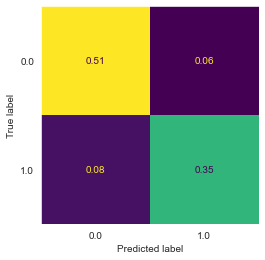

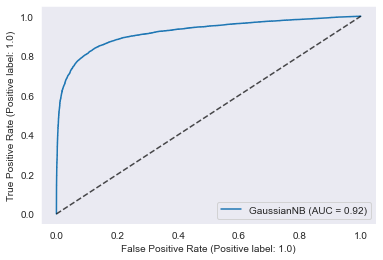

In [73]:
# Ungrouped
nb=GaussianNB()
perf_nb = overall(nb, X_train, X_test, y_train, y_test, 'GaussianNB Ungrouped')

In [74]:
perf_nb

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
GaussianNB Ungrouped,0.866958,0.003009,0.866928,0.860406,0.8161,0.855429,0.835302,0.920237


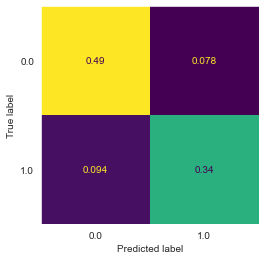

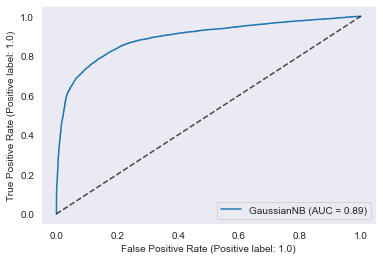

In [75]:
# Grouped
nb1=GaussianNB()
perf_nb1 = overall(nb1, X1_train, X1_test, y1_train, y1_test, 'GaussianNB Grouped')

In [76]:
perf_nb1

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
GaussianNB Grouped,0.83476,0.001476,0.83474,0.827871,0.782214,0.813739,0.797665,0.892015


We've achieved decent results across all metrics!

### Model 2: Logistic Regression

Here we carry out some basic hyperparameter tuning:

In [77]:
# Ungrouped - with Hyperparamter Tuning including default hyperparameters
logistic = LogisticRegression(random_state = random_seed)

#Most relevant hyperparameters
params={'C' : [0.01,0.1,1,10], 'penalty' : ['l2'], 'solver' : ['newton-cg', 'liblinear', 'saga', 
                                                               'sag']}

#Grid Search
searcher = GridSearchCV(logistic, params, cv=10, n_jobs=-1).fit(X_train,y_train)

print('Best HyperParameter Tuned (GRID) Logistic Model:', searcher.best_estimator_)
# Best HyperParameter Tuned (GRID) Logistic Model: LogisticRegression(C=1, 
#random_state=2, solver='newton-cg')

Best HyperParameter Tuned (GRID) Logistic Model: LogisticRegression(C=1, random_state=2, solver='sag')


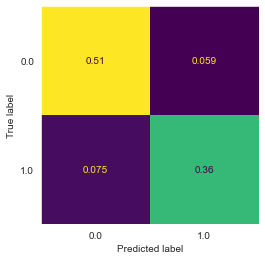

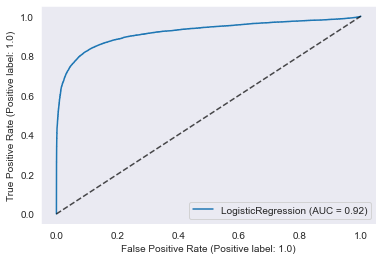

In [80]:
logistic = LogisticRegression(C = 1, random_state = 2, penalty = 'l2', solver = 'newton-cg')
perf_lr = overall(logistic, X_train, X_test, y_train, y_test, 'Logistic Regression Ungrouped HT')

In [81]:
perf_lr

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
Logistic Regression Ungrouped HT,0.87394,0.002228,0.87398,0.866285,0.828189,0.85854,0.843092,0.919625


In [84]:
# Grouped
logistic1 = LogisticRegression(random_state = random_seed)

#Most relevant hyperparameters
params={'C' : [0.01,0.1,1,10], 'penalty' : ['l2'], 'solver' : ['newton-cg', 'liblinear', 'saga', 
                                                               'sag']}

#Grid Search
searcher1 = GridSearchCV(logistic1, params,cv=10, n_jobs=-1).fit(X1_train,y1_train)

print('Best HyperParameter Tuned (GRID) Logistic Model:', searcher1.best_estimator_)
# Best HyperParameter Tuned (GRID) Logistic Model: LogisticRegression(C=0.1, 
#random_state=2, solver='liblinear')

Best HyperParameter Tuned (GRID) Logistic Model: LogisticRegression(C=0.1, random_state=2, solver='liblinear')


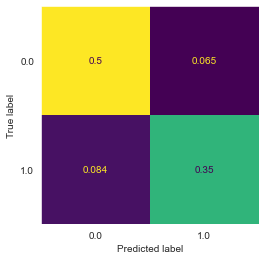

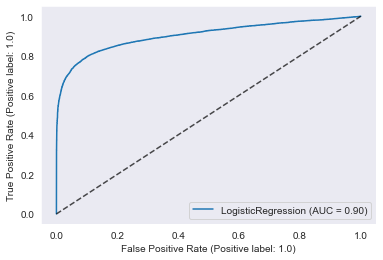

In [85]:
logistic1 = LogisticRegression(C = 0.1, random_state = 2, penalty = 'l2', solver = 'liblinear')
perf_lr1 = overall(logistic1, X1_train, X1_test, y1_train, y1_test, 'Logistic Regression Grouped HT')

In [329]:
perf_lr1

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
Logistic Regression Grouped HT,0.856145,0.002114,0.856284,0.853258,0.802975,0.851296,0.82643,0.907854


In both ungrouped and grouped datasets, we have yielded further improved metrics using Logistic Regression!

### NOTE:

It can be seen even after fitting two of the most basic classifiers, our grouped data, whilst improved with Logistic Regression consistently underperformed compared to the ungrouped dataset which is performing significantly better. 

We expect this case to carry on as models get more complex, hence we've decided to remove the grouped dataset, showing that our grouped or feature engineered variables did not help in contributing to satisfaction as well as its ungrouped counterpart, answering part of question 5.

Maybe a different aggregation could have helped e.g. the median instead of the mean, or that grouping genuinely doesn't help at all - this would be another route to take in this analysis to further investigate

### Model 3 - Linear SVC

This model was chosen over SVM as training is significantly faster for larger datasets.

In [87]:
params = {'C':[0.01,0.1,1], 'max_iter': [2000]}
svc = LinearSVC(random_state = random_seed)
#Grid Search
searcher = GridSearchCV(svc, params, cv=10, n_jobs=-1).fit(X_train,y_train)
print('Best HyperParameter Tuned (GRID) Linear SVC Model:', searcher.best_estimator_)
# best parameters:  LinearSVC(C=1, max_iter=1500, random_state=2)

Best HyperParameter Tuned (GRID) Linear SVC Model: LinearSVC(C=1, max_iter=2000, random_state=2)


In [88]:
svc = LinearSVC(C = 1, max_iter = 1500, random_state = random_seed)

Producing ROC Curves and determing AUC for Linear SVM's are difficult as the classifier doesn't return posterior probabilities so these were omitted, calculating the remaining metrics manually:

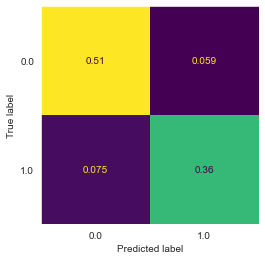

In [89]:
cv_results = cross_val_score(svc, X_train, y_train, cv = 5)
crossval_mean = np.mean(cv_results)
crossval_sd = np.std(cv_results)
    
#fits model
svc.fit(X_train, y_train)
    
#used to make predictions on the test set
y_predictions = svc.predict(X_test)
    
 # gets both the training and test set accuracies
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
    
# all our accuracy metrics are calculated
#accuracy_Score = accuracy_score(y_predictions, y_test)
precision_Score = precision_score(y_predictions, y_test)
Recall_Score = recall_score(y_predictions, y_test)
F1_Score = f1_score(y_predictions, y_test)

svc_perf = pd.DataFrame({'CrossVal Mean Acc.' : crossval_mean,
                          'CrossVal SD' : crossval_sd,
                          'Train Acc.' : train_score,
                          'Test Acc.' : test_score,
                          'Precision' : precision_Score,
                          'Recall' : Recall_Score,
                          'F1' : F1_Score,
                          'ROC-AUC': 'NA'
                         }, index = ['Linear SVC Ungrouped HT'])

plot_confusion_matrix(svc, X_test, y_test, normalize = 'all', colorbar = False)
plt.show()

In [90]:
svc_perf

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
Linear SVC Ungrouped HT,0.873056,0.002168,0.873264,0.866206,0.82764,0.858786,0.842925,NA


We notice this model is performing identically to its Logistic Regression counterpart

### Model 4: Decision Trees

In [91]:
params = {'criterion' : ['gini', 'entropy'], 'max_depth': [*range(1,20,2)], 
          'min_samples_split': [*range(10,500,20)]}
dt = DecisionTreeClassifier(random_state=random_seed)
#Grid Search
searcher = GridSearchCV(dt, params, cv=10, n_jobs=-1).fit(X_train,y_train)
print('Best HyperParameter Tuned (GRID) Decision Tree Model:', searcher.best_estimator_)

# best parameters:  DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=2)

Best HyperParameter Tuned (GRID) Decision Tree Model: DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=2)


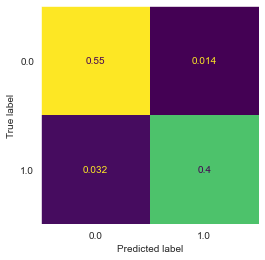

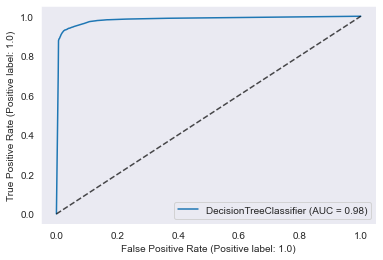

In [92]:
dt = DecisionTreeClassifier(max_depth = 15, random_state = 2, min_samples_split = 10)
perf_dt = overall(dt, X_train, X_test, y_train, y_test, 'Decision Tree Ungrouped HT')

In [93]:
perf_dt

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
Decision Tree Ungrouped HT,0.953511,0.001423,0.968319,0.954276,0.9271,0.966119,0.946207,0.983055


We see excellent performances here, currently outperforming all previous models! We expect ensemble methods such as random forests to further boost this! This was immensely quick to fit toom taking less than 1.5 secs.

### Model 5: Random Forests

Hyperparameter tuning for Random Forests is time-consuming and requires a lot of computing power, hence this wasn't carried out - a default fit was made:

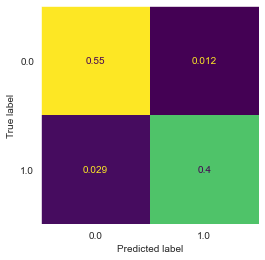

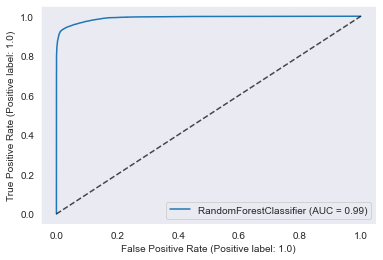

In [82]:
rt = RandomForestClassifier(random_state=random_seed, n_jobs = -1)
perf_rf = overall(rt, X_train, X_test, y_train, y_test, 'Random Forest Ungrouped')

In [83]:
perf_rf

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
Random Forest Ungrouped,0.959936,0.000516,0.99998,0.959163,0.933236,0.971494,0.951981,0.992093


### Conclusions

In [94]:
performances = pd.concat([perf_nb, perf_nb1, perf_lr, perf_lr1, svc_perf, perf_dt, perf_rf], axis = 0)
performances

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
GaussianNB Ungrouped,0.866958,0.003009,0.866928,0.860406,0.816100,0.855429,0.835302,0.920237
GaussianNB Grouped,0.834760,0.001476,0.834740,0.827871,0.782214,0.813739,0.797665,0.892015
Logistic Regression Ungrouped HT,0.873940,0.002228,0.873980,0.866285,0.828189,0.858540,0.843092,0.919625
Logistic Regression Grouped HT,0.856401,0.002025,0.856470,0.851388,0.807034,0.843576,0.824901,0.903886
Linear SVC Ungrouped HT,0.873056,0.002168,0.873264,0.866206,0.827640,0.858786,0.842925,NA
Decision Tree Ungrouped HT,0.953511,0.001423,0.968319,0.954276,0.927100,0.966119,0.946207,0.983055
Random Forest Ungrouped,0.959936,0.000516,0.999980,0.959163,0.933236,0.971494,0.951981,0.992093


In [95]:
# just ungroupd models:
performances1 = pd.concat([perf_nb, svc_perf, perf_lr, perf_dt, perf_rf], axis = 0)
performances1

,CrossVal Mean Acc.,CrossVal SD,Train Acc.,Test Acc.,Precision,Recall,F1,ROC-AUC
GaussianNB Ungrouped,0.866958,0.003009,0.866928,0.860406,0.816100,0.855429,0.835302,0.920237
Linear SVC Ungrouped HT,0.873056,0.002168,0.873264,0.866206,0.827640,0.858786,0.842925,NA
Logistic Regression Ungrouped HT,0.873940,0.002228,0.873980,0.866285,0.828189,0.858540,0.843092,0.919625
Decision Tree Ungrouped HT,0.953511,0.001423,0.968319,0.954276,0.927100,0.966119,0.946207,0.983055
Random Forest Ungrouped,0.959936,0.000516,0.999980,0.959163,0.933236,0.971494,0.951981,0.992093


The above table of just ungrouped data, highlights just how powerful the random forests model was - we could also coincidentally see improvements as we progressed though models, with big jumps in performances between logistic regression and decision trees.

This goes to show, how powerful highly complex ensemble methods such as Random Forests, XGBoost, AdaBoost, Voting and Bagging Classifiers are. We would expect some of the just mentioned models which weren't used to further outperform random forests however we would expect only marginal improvements.

As expected random forests proved to outperform decision trees, which is natural as it 'ensembles' decision trees, and therefore outperformed every other model. Furthermore, we observed excellent values across all metrics, achieving 96% Test Accuracy, very high precision and recall yielding 95% Precision and a near perfect AUC.

Hence, this is the optimal model, which will prove to be a reliable tool for airlines to quickly analyze passenger surveys given the sheer amount of passengers who fly across long periods of time

Now, using our best model, i.e. the Random Forests model, lets assess feature importances to determine whether all the features we deemed important were actually important in modelling:

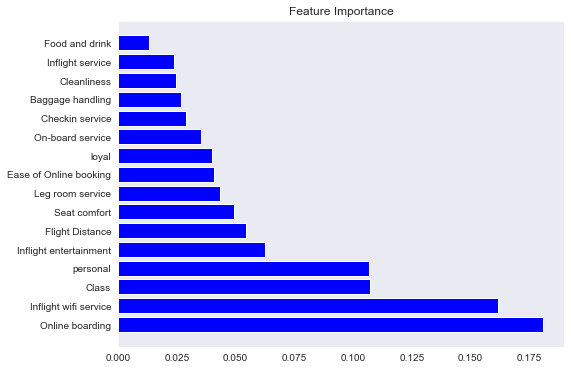

In [96]:
importances = rt.fit(X_train, y_train).feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns = ['Importance']).sort_values('Importance', 
                                                                               ascending = False)
plt.figure(figsize=(8, 6))
plt.barh(importances.index, importances['Importance'], color = 'blue')
plt.title('Feature Importance')
plt.show()

What we see is that, all features we said were important indeed were. Whilst some features are being used more than others e.g. Online Boarding and Inflight Service, all features contributed which is great news.

Thus concluding Question 5 and this analysis